<a href="https://colab.research.google.com/github/guilhermeacacio/estudoMachineLearnNaiveBayes/blob/master/baseCensus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando as Biblitocas

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
base_census = pd.read_csv('census.csv') #Lendo o Arquivo Census

In [ ]:
base_census #Dataframe do arquivo Census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
base_census.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
base_census.isnull().sum() #Verificando se existem valores invalidos

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

In [ ]:
np.unique(base_census['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

In [ ]:
import seaborn as sns #Plotando os gráficos

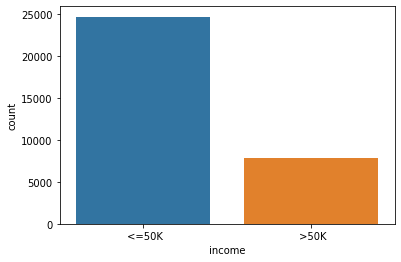

In [ ]:
sns.countplot(x=base_census['income']); #Numero de pessoas que ganham menos e mais que 50K

In [ ]:
import matplotlib.pyplot as plt

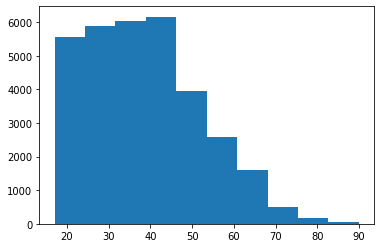

In [ ]:
plt.hist(x=base_census['age']); #Histograma que representa a frequencia com que cada idade aparece

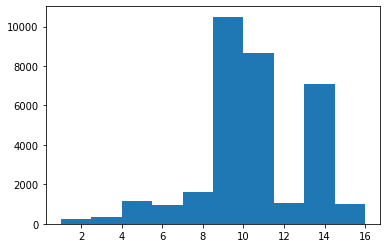

In [ ]:
plt.hist(x=base_census['education-num']); #Histograma que representa a frequencia com que aparece o tempo que cada pessoa estudou

In [ ]:
import plotly.express as px

In [ ]:
grafico = px.treemap(base_census, path=['workclass', 'age']) #Grafico que divide em subgrupos de workclass e age
grafico.show()

In [ ]:
grafico = px.treemap(base_census, path=['occupation', 'relationship', 'age']) #Grafico que divide em subgrupos de ocupação, relacionamento e idade

In [ ]:
grafico = px.parallel_categories(base_census, dimensions=['occupation', 'relationship']) #Grafico que representa a relação entre a ocupação e o status de relacionamento
grafico.show()

In [ ]:
grafico = px.parallel_categories(base_census, dimensions=['education-num', 'income']) #Grafico que representa o tempo de estudo e a renda anual
grafico.show()

### Divisão de previsores e classes

In [ ]:
x_census = base_census.iloc[:, 0:14].values #Separando os previsores

In [ ]:
x_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [ ]:
y_census = base_census.iloc[:, 14] #Separando as classes

In [ ]:
y_census.values

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
x_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

### Tratamento de atributos categoricos

In [ ]:
from sklearn.preprocessing import LabelEncoder #Função para tratar os atributos categoricos - os classifica através de valores inteiros para que possam ser aplicados em algoritmos de ML

In [ ]:
 label_encoder_teste = LabelEncoder()

In [ ]:
x_census[:, 1]

array([' State-gov', ' Self-emp-not-inc', ' Private', ..., ' Private',
       ' Private', ' Self-emp-inc'], dtype=object)

In [ ]:
teste = label_encoder_teste.fit_transform(x_census[:, 1]) #transforma os atributos da coluna de numero 1 em valores

In [ ]:
teste

array([7, 6, 4, ..., 4, 4, 5])

In [ ]:
base_census.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
x_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [ ]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital= LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [ ]:
x_census[:, 1] = label_encoder_workclass.fit_transform(x_census[:, 1])
x_census[:, 1]

array([7, 6, 4, ..., 4, 4, 5], dtype=object)

In [ ]:
x_census[:, 3]

array([' Bachelors', ' Bachelors', ' HS-grad', ..., ' HS-grad',
       ' HS-grad', ' HS-grad'], dtype=object)

In [ ]:
x_census[:, 3] = label_encoder_education.fit_transform(x_census[:, 3])
x_census[:, 3]

array([9, 9, 11, ..., 11, 11, 11], dtype=object)

In [ ]:
x_census[:, 5] = label_encoder_marital.fit_transform(x_census[:, 5])
x_census[:, 6] = label_encoder_occupation.fit_transform(x_census[:, 6])
x_census[:, 7] = label_encoder_relationship.fit_transform(x_census[:, 7])
x_census[:, 8] = label_encoder_race.fit_transform(x_census[:, 8])
x_census[:, 9] = label_encoder_sex.fit_transform(x_census[:, 9])
x_census[:, 13] = label_encoder_country.fit_transform(x_census[:, 13])

In [ ]:
base_census.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
x_census[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

In [ ]:
x_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder #Como os valores o LabelEncoder podem ser entendidos como um mais prioritario que outro pelo algoritmo de ML, visto que são todos numéricos, precisamos codificalos de uma forma que todos possuam o mesmo padrão, ou seja, em números binarios 
from sklearn.compose import ColumnTransformer

In [ ]:
onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1, 3, 5, 6, 7, 8, 9, 13])], remainder='passthrough') #transformando os valores em binarios

In [ ]:
onehotencoder_census

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHot', OneHotEncoder(),
                                 [1, 3, 5, 6, 7, 8, 9, 13])])

In [ ]:
type(onehotencoder_census)

sklearn.compose._column_transformer.ColumnTransformer

In [ ]:
x_census = onehotencoder_census.fit_transform(x_census).toarray() #passando os valores binarios para um array da função numpy

In [ ]:
type(x_census)

numpy.ndarray

In [ ]:
x_census[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

## Escalonamento dos valores

In [ ]:
from sklearn.preprocessing import StandardScaler #Escalonando todos os valores
scaler_census = StandardScaler()
x_census = scaler_census.fit_transform(x_census)

In [ ]:
x_census[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

## Divisão das bases em teste e treinamento

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_census_train, x_census_test, y_census_train, y_census_test = train_test_split(x_census, y_census, test_size=0.15, random_state=0) #separando os dados de teste e treinamento

In [ ]:
x_census_train.shape, x_census_test.shape

((27676, 108), (4885, 108))

In [ ]:
y_census_train.shape, y_census_test.shape

((27676,), (4885,))

In [ ]:
x_census.shape

(32561, 108)

In [ ]:
x_census_train[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933,  3.43718582, -0.20376145, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433, -0.44365705, -0.11334387,
        1.44939722, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695,  1.08361066, -0.11403678, -0.69878376,
       -0.1802846 , -0.17735813, -0.24494366, -0.36186143, -0.01662771,
       -0.37949517,  2.64728466, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355,  1.21163164, -0.58514059, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

## Salvar as Variaveis


In [ ]:
import pickle #salvando os dados de teste e treinamento

In [ ]:
with open('census.pkl', mode='wb') as f:
  pickle.dump([x_census_train, y_census_train, x_census_test, y_census_test], f)

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB #Importando a função responsavel pela classificação dos dados

In [ ]:
with open ('census.pkl', 'rb') as f: #lendo os dados de teste e treinamento
  x_census_train, y_census_train, x_census_test, y_census_test = pickle.load(f)

In [ ]:
x_census_train.shape

(27676, 108)

In [ ]:
naive_censusData = GaussianNB()
naive_censusData.fit(x_census_train, y_census_train) #Aplicando o algoritmo de Naive Bayes ao dados de treino e teste

GaussianNB()

In [ ]:
previsoes = naive_censusData.predict(x_census_test) #testando os dados treinados

In [ ]:
previsoes #resultado obtido

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [ ]:
y_census_test.values #resultado esperado

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_census_test, previsoes) #precisão do algoritmo de 47%

0.4767656090071648

In [ ]:
confusion_matrix(y_census_test, previsoes)
#1172 dados verificados como <=50k foram classificados corretamente
#2521 dados verificados como <=50k foram classificados errados
#35 dados verificados como >50k foram classificados errados
#1157 dados verificados como >50k foram classificados corretamente
#Algoritmo tem uma precisão melhor para classificar os dados >50k

array([[1172, 2521],
       [  35, 1157]])

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

0.4767656090071648

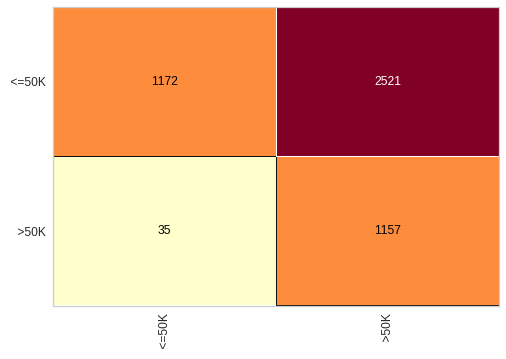

In [ ]:
cm = ConfusionMatrix(naive_censusData)
cm.fit(x_census_train, y_census_train)
cm.score(x_census_test, y_census_test)

In [ ]:
print(classification_report(y_census_test, previsoes))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885

